# sequence oriented tasks

- sequential data: time series, DNA sequence, weather, text, audio, video

- seq oriented tasks have variable length inputs, variable length outputs, variable length computation, must remember hidden state info

- Examples of seq oriented tasks

    Text classification
    - input: sum of word embeddings of text 
    - output: predicted class (softmax)

    Named Entity recognition
    - input: sequence of word embeddings of surrounding context 
    - output: predicted label of named entities (softmax)

    POS tagging
    - input: sequence of word embeddings of surrounding context 
    - output: predicted part of speech (softmax)

    **Sequence-to-sequence tasks (seq2seq)**
    - input: a sequence of word embeddings
    - output: a sequence (softmax)
    
    e.g Language modeling
    - input: sequence of word embeddings of preceding context 
    - output: predicted next word (softmax)




<img src='https://static.packt-cdn.com/products/9781789536089/graphics/assets/0bd4c08a-3dbf-4d48-9fb8-d7800c486b63.png' />

# beam search

- beam search is a greedy algorithm widely used in sequence generation tasks to find the most likely output sequence in a computationally efficient manner.

- Beam search provides a trade-off between the computational cost and search quality. 

- hyperparameter: beam size (K: number of possible sequences)

    A larger beam width increases the likelihood of finding a better solution but requires more computational resources. 

Algorithm

1. Initialize the beam with the [BOS]

2. At each time step, expand the sequences in the beam by considering all possible next tokens.

3. Score each expanded sequence using a scoring function.

4. Keep only the top K sequences (where K is the beam width) based on their scores and discard the rest.

5. Repeat steps 2-4 until the [EOS] is reached for all sequences in the beam.

6. Choose the sequence with the highest score as the final output.

<image src='https://d2l.ai/_images/beam-search.svg' />

# problem of MLP for sequential data

n-gram language model: a word only depend on previous $N-1$ words (context)

$$P(w_{t} | w_{t-1}, w_{t-2}, ..., w_{1}) \approx P(w_{t} | w_{t-1}, w_{t-2}, ..., w_{t-N+1})$$


To estimate the conditional probability $P(w_n | w_{t-1}, w_{t-2}, ..., w_{t-N+1})$, we can use Bayes rule based on the counts of the n-grams in the training data. Specifically, we can estimate the probability as:

$$P(w_{t} | w_{t-1}, w_{t-2}, ..., w_{t-N+1}) 
= \frac{P(w_{t-N+1}, w_{t-N+2}, ..., w_{t})}{P(w_{t-N+1}, w_{t-N+2}, ..., w_{t-1})}\\[1em]
\approx \frac{\text{count}(w_{t-N+1}, w_{t-N+2}, ..., w_{t})}{\text{count}(w_{t-N+1}, w_{t-N+2}, ..., w_{t-1})}$$

where numerator is the number of times the n-gram $w_{t-N+1}, w_{t-N+2}, ..., w_{t}$ appears in the training data, 

and denominator is the number of times the (N-1)-gram $w_{t-N+1}, w_{t-N+2}, ..., w_{t-1}$ appears in the training data.

e.g. for 4-gram N = 4, probability of word 'store' occurred given context 'walked to the' is

$$P(\text{store} | \text{walked to the}) \approx \frac{\text{count}(\text{walked to the store})}{\text{count}(\text{walked to the})}$$


Problems of N-gram model

- Sparsity of input: 

    an input sequence is represented as a feature vector of ngram vocabulary size, whose entry is the number of occurrence of a unique n-gram.
    
    as N increases, the ngram vocabulary size grows exponentially, leading to sparse representations because most N-grams in the corpus are unique or rare. 


- large model size $O(|v|^N)$: 

    as N increase, input dimension increase exponentially.

    increasing the model's size and memory requirements, lead to slower training and inference times and require more computational resources. 


- Limited context: context window size is small ($N-1$). can't hdandle longer-range dependencies. 

Feature Vector Representation (Bag of N-grams):

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
documents = [
    "I like cat and dog like cat like cat",
    "cat like I and dog",
    "Dog like cat and I"
]

# initialize a CountVectorizer with ngram_range set to desired N-gram value
# For example, (2, 2) for bigrams, (3, 3) for trigrams, etc.
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the text data and transform the text into feature vectors
X = vectorizer.fit_transform(documents)
#  For each sequence, count the occurrences of each unique N-gram and create a feature vector 
#  (3, 7) sparse matrix  where each position corresponds to a unique N-gram and the value represents its frequency

# Extract all the unique N-grams from the dataset
ngram_vocab = vectorizer.get_feature_names()
print(ngram_vocab)

# Convert the feature vectors to an array and print 
print(X.toarray()) 

['and dog', 'cat and', 'cat like', 'dog like', 'like and', 'like cat']
[[1 1 1 1 0 3]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]]


# Recurrent Neural Network

Recurrent Neural Network is a class of NN designed for processing sequential data. 

The key feature is their ability to maintain a hidden state that can capture information from previous time steps in the sequence. 

This allows RNNs to exhibit temporal dynamic behavior and learn patterns across variable-length input and output sequences.

making them suitable for tasks involving time series data, sequence-to-sequence NLP tasks, and any context where sequential dependencies are important.

## Comparison of units in RNN, LSTM, GRU

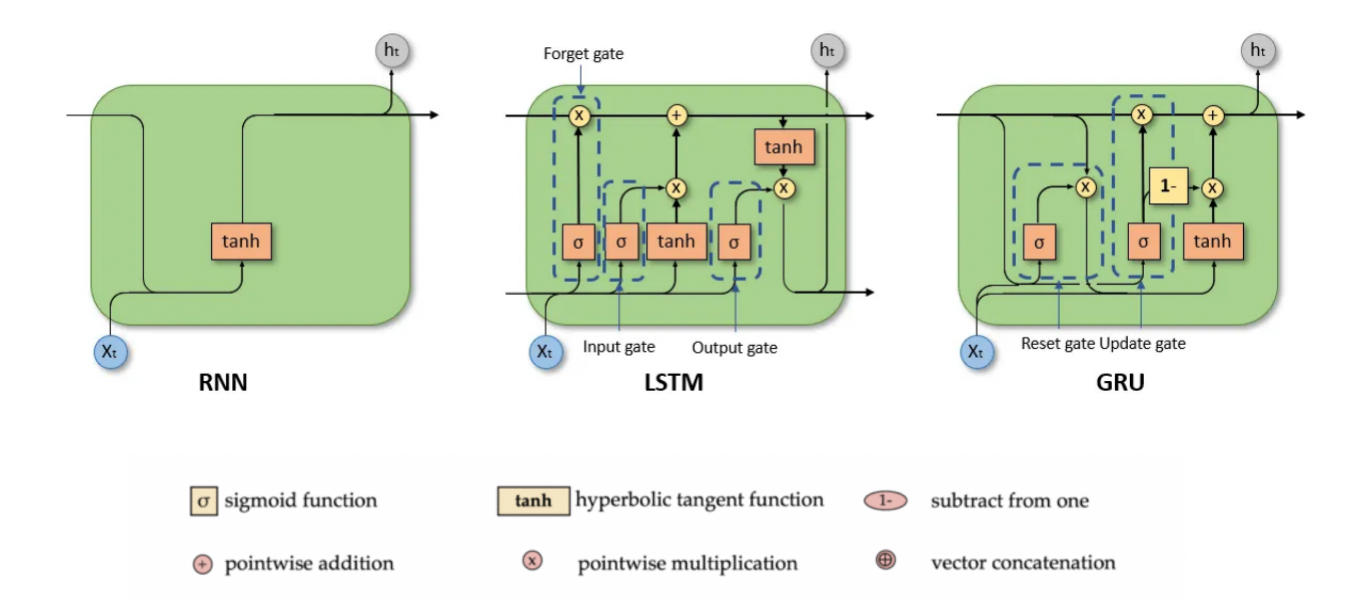

## backpropagation through time (BPTT)

Backpropagation Through Time (BPTT): A training algorithm for recurrent neural networks (vanilla RNN, LSTM, GRU) that extends the standard backpropagation technique to handle sequences.

- Sequence processing: RNNs process input sequences, maintaining a hidden state that captures information from previous time steps.

- Unrolling: BPTT unrolls the RNN through time, creating a feedforward network-like structure with multiple time steps, allowing the application of standard backpropagation.

- Computing gradients: by starting at time t, BPTT computes gradients of loss function w.r.t network parameters on successively preceding time steps by backpropagating the error from output layer to the input layer across time steps, summing gradients as you proceed.

- Weight sharing: RNNs use shared weights across time steps, so the gradients are accumulated from all time steps before updating the weights.

truncated BPTT: addressing the issues of long training time and vanishing/exploding gradients.

- hyperparameter: number of time steps considered in the gradient computation, 

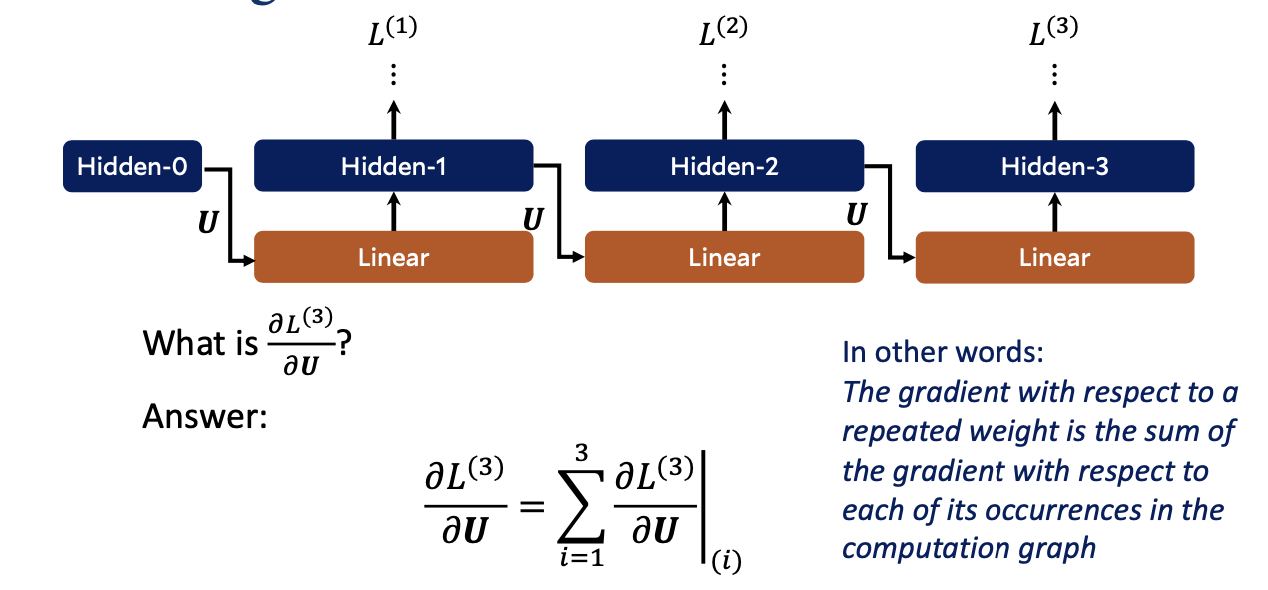

## teacher forcing

Teacher forcing is a training technique used in seq-to-seq models, forcing "forces" the model to learn from the correct output sequence.

- training: input to decoder at each time step is **ground truth target sequence**, rather than using predicted output from the previous time step as input.

- inference: input to decoder is its own predictions from previous time steps.


problem: 

- Exposure bias and overfitting: model may not learn to handle its own errors during inference.

- solution: scheduled sampling or curriculum learning

    initially trained with teacher forcing, then gradually transitions to using its own predictions as input during the training process.

# SRN

- SRN is Simple Recurrent Network designed to capture short-term dependencies in sequential data but suffer from vanishing and exploding gradient problems when dealing with long sequences.


- Processes input sequences one element at a time.

- Maintains a hidden state that can capture information from previous time steps.

    hidden state at time step $t$:

    $$\mathbf{h}_t = \text{tanh}(W_{h}\mathbf{h}_{t-1} + W_{x}\mathbf{x}_{t} + \mathbf{b})$$

    - $\mathbf{h}_{t-1}$: hidden state at the previous time step
    - $\mathbf{x}_{t}$: input at time step $t$

- in feedforward nets, hidden states are completely determined by current **input**

    in RNN, hidden layers are determined both by **current input $\mathbf{x}_{t}$ and previous input $\mathbf{x}_{t-1}$**.

## limitation

These limitations led to the development of more advanced RNN architectures, such as **Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks**

**Vanishing gradient problem**:

- Occurs when gradients of loss w.r.t weights become very small during backpropagation.

- Caused by long sequences and repeated multiplication of gradients through time, resulting in gradients exponentially decreasing as they move back through the sequence.

- Leads to difficulties in learning long-range dependencies, as the effect of earlier inputs on the final output is diminished.


**Exploding gradient problem**:

- Occurs when gradients of loss w.r.t weights become very large during backpropagation.

- Caused by long sequences and repeated multiplication of gradients through time, resulting in gradients exponentially increasing as they move back through the sequence.

- Leads to unstable learning and difficulty in convergence, as large gradients can cause the **model parameters to oscillate or diverge**.


Given a SRN with one hidden layer and a softmax output layer

loss is cross-entropy loss.

$\mathbf{U}$ is recurrent weights, $\mathbf{W_h}$ is input weights, $\mathbf{W_o}$ is output weights

$\mathbf{z}$ is intermediate variable, $\mathbf{h}$ is activation, $\sigma$ is sigmoid

$$
\begin{aligned}
\mathbf{z}^{(t)}&= \mathbf{W_h h}^{(t)}+ \mathbf{U h^{(t-1)}} + \mathbf{b_h} \\
\mathbf{h}^{(t)}&= \sigma(\mathbf{z}^{(t)}) \\
\mathbf{y}^{(t)}&= \text{softmax}(\mathbf{W_o h}^{(t)}+ \mathbf{b_o}) \\
\mathbf{L}^{(t)}&= - \mathbf{y}^{(t)}\log(\mathbf{\hat y^{(t)}}) \\
\frac{\partial \mathbf{L^{(3)}}}{\partial \mathbf{U}} &= \frac{\partial \mathbf{L^{(3)}}}{\partial \mathbf{y^{(3)}}} \frac{\partial \mathbf{y^{(3)}}}{\partial \mathbf{h^{(3)}}} \frac{\partial \mathbf{h^{(3)}}}{\partial \mathbf{z^{(3)}}} \frac{\partial \mathbf{z^{(3)}}}{\partial \mathbf{U}}
\end{aligned}
$$


gradient of intermediate variable w.r.t recurrent weights contains 2 terms of derivative of sigmoid (colored red) $\frac{\partial \sigma(x)}{\partial x}=\sigma(x)(1-\sigma(x))$

\begin{aligned}
\frac{\partial \mathbf{z^{(3)}}}{\partial \mathbf{U}} 
&= \mathbf{U}\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{U}} + \frac{\partial \mathbf{U }}{\partial \mathbf{U}}\mathbf{h^{(2)}} \\
&= \mathbf{U}\left(\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{z^{(2)}}}\frac{\partial \mathbf{z^{(2)}}}{\partial \mathbf{U}}\right) + \mathbf{h^{(2)}} \\
&= \mathbf{U}\left(\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{z^{(2)}}}\left(\mathbf{U}\frac{\partial \mathbf{h^{(1)}}}{\partial \mathbf{U}} + \mathbf{h}^{(1)}\right)\right) + \mathbf{h^{(2)}} \\
&= \mathbf{U}\left({\color{red}{\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{z^{(2)}}}}}\left(\mathbf{U}\left({\color{red}{\frac{\partial \mathbf{h^{(1)}}}{\partial \mathbf{z^{(1)}}}}}\left(\mathbf{U}\frac{\partial \mathbf{h^{(0)}}}{\partial \mathbf{U}} + \mathbf{h}^{(0)}\right)\right) + \mathbf{h}^{(1)}\right)\right) + \mathbf{h^{(2)}} \\
\end{aligned}

## bidirectional RNN

Bidirectional RNN

- A type of RNN architecture that processes the input sequence in both forward and backward directions.

- It has two separate layers: one for forward processing and one for backward processing.

- Each layer generates its own hidden state sequences, which are then combined to create a single output sequence.

**Advantages**:

- Captures both past (forward) and future (backward) context, leading to richer representations.

- Better at handling long-range dependencies compared to unidirectional RNNs.

- Improved performance in various NLP tasks such as sequence labeling, sentiment analysis, and machine translation.

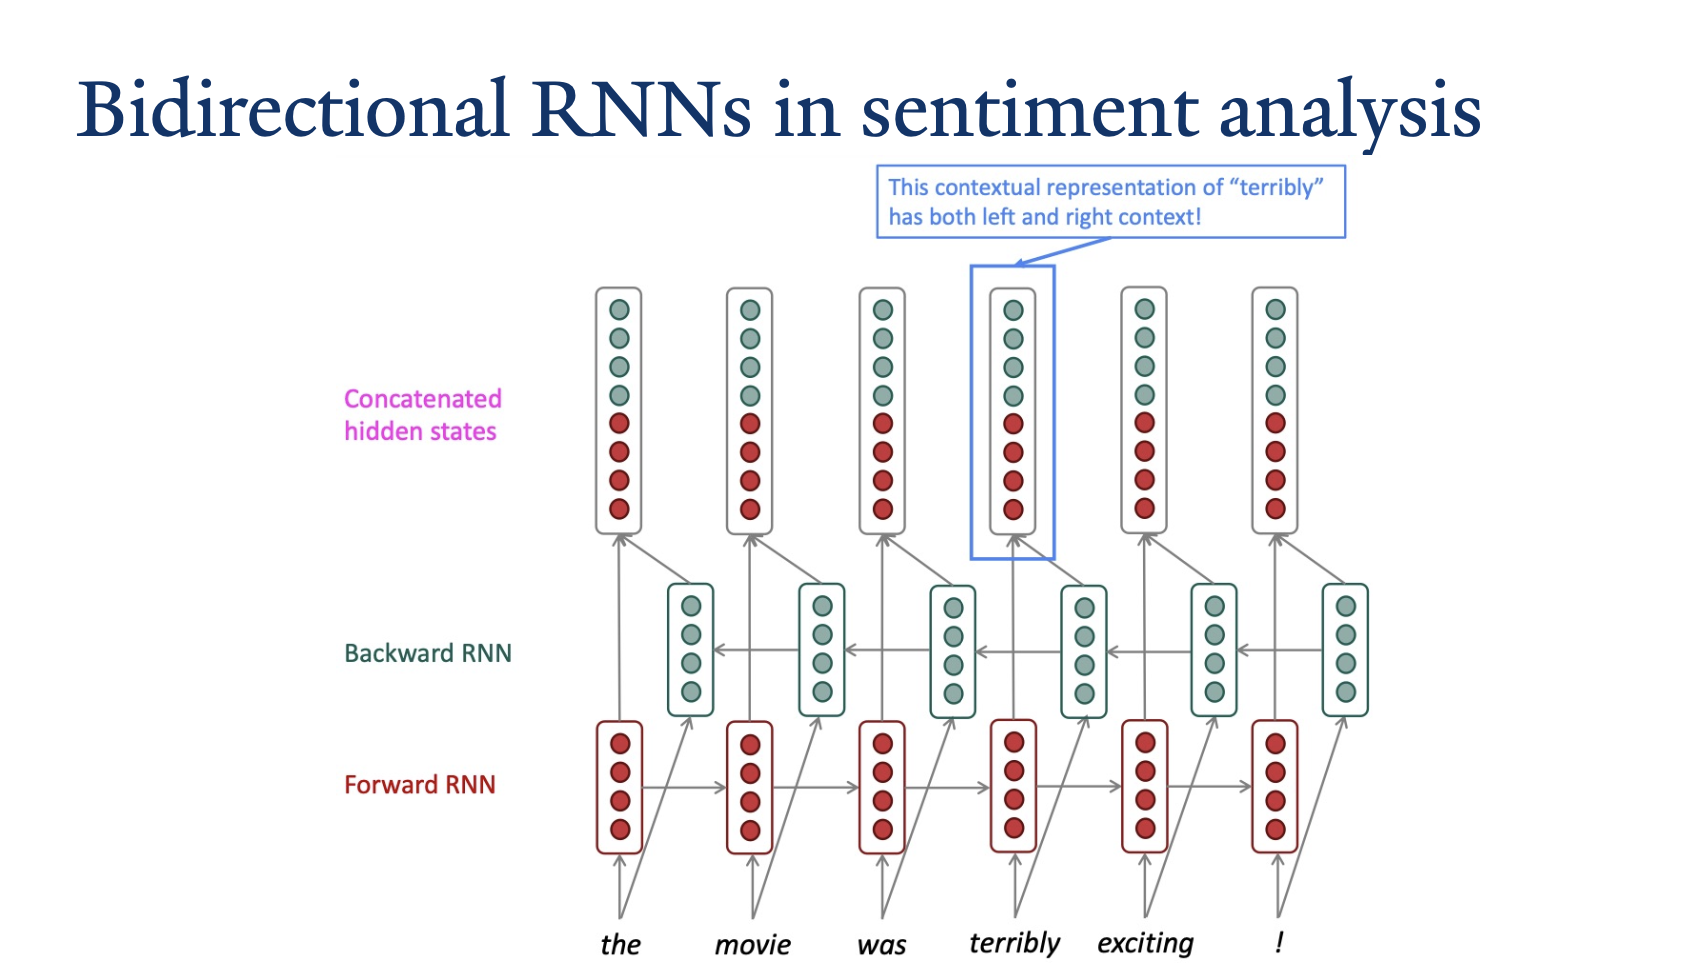

### architecture

- Forward hidden state: $\mathbf{h}_t^{(f)} = f(\mathbf{h}_{t-1}^{(f)}, \mathbf{x}_{t})$

- Backward hidden state: $\mathbf{h}_t^{(b)} = f(\mathbf{h}_{t+1}^{(b)}, \mathbf{x}_{t})$

- Output at time step t: $y_t = g(\mathbf{h}_t^{(f)}, \mathbf{h}_t^{(b)})$

where
- $f$ is the RNN function for updating hidden states.
- $g$ is the output function.
- $\mathbf{x}_{t}$ is the input at time step t.
- $\mathbf{h}_t^{(f)}$ and $\mathbf{h}_t^{(b)}$ are the forward and backward hidden states at time step t, respectively.
- $y_t$ is the output at time step t.


# LSTM

LSTM  (Long Short-Term Memory networks): A type of RNN designed to capture **long-term dependencies** by incorporating memory cells and gating mechanisms like **skip connection through time**

## architecture: memory cell

memory cell: core component of LSTM architecture, a unit responsible for storing and retaining information over long sequences, addressing the vanishing gradient problem commonly encountered in standard RNNs.

An LSTM cell contains the following key components:

- Gates: LSTM cells use 3 kinds of gates to regulate flow of information within unit:

    - Input gate: Determines how much of the new information from the current input should be added to the cell state.

        $$
        i_t = \sigma(W_i \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_i)
        $$

    - Forget gate: Decides which information should be discarded or retained from the previous cell state.

        $$
        f_t = \sigma(W_f \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_f)
        $$

        $\sigma$ is sigmoid function outputs a value between 0 and 1 and controls how much of an input should be let through

    - Output gate: Controls how much of updated cell state should be used to compute the current hidden state $\mathbf{h}_t$, which is passed to the next layer or time step.

        $$
        o_t = \sigma(W_o \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_o)
        $$

- Cell state $\mathbf{C}_t$: a vector that runs through the entire LSTM unit and allows the network to store and preserve information across time steps. 

    It can be selectively updated, read, or cleared based on the input data and network's internal gating mechanisms.

    Cell state is a weighted average of previous hidden state and new hidden state

    $$
    \mathbf{C}_t = f_t * \mathbf{C}_{t-1} + i_t * \tilde{\mathbf{C}_t}
    \\[1em]
    \tilde{\mathbf{C}}^{(t)}= \tanh (W_C \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_C)
    $$
    
- current hidden state $\mathbf{h}_t$ is computed as weighted average of previous hidden state $\mathbf{h}_{t-1}$ and current input $\mathbf{x}_{t}$ multiplied by running state $\mathbf{C}_t$

    $$
    \mathbf{h}_t = o_t * \tanh (\mathbf{C}_t)
    $$

## ElMo (BiLSTM)

ElMo (Embeddings from Language Models) is a contextual word embedding model with bidirectional LSTM architecture.

1. Character Embeddings: Represent each word with its character-level embeddings using a Convolutional Neural Network (CNN) followed by max-pooling.

    $$x_{c} = \text{CNN}(w_{c})$$

2. Bi-directional Language Models (BiLMs): Train a bi-directional LSTM on a large corpus to learn contextual word embeddings.

    - Forward LSTM: $h_{t}^{\text{forward}} = \text{LSTM}^{\text{forward}}(x_{t}, h_{t-1}^{\text{forward}})$

    - Backward LSTM: $h_{t}^{\text{backward}} = \text{LSTM}^{\text{backward}}(x_{t}, h_{t+1}^{\text{backward}})$

3. Concatenation of Embeddings: Concatenate the embeddings from the forward and backward LSTMs for each word.

    $$h_{t} = \text{Concat}(h_{t}^{\text{forward}}, h_{t}^{\text{backward}})$$

4. Weighted Sum of Layer Representations: Compute a weighted sum of the LSTM layer representations for each word to create the final ElMo embedding.

    $$E_{t} = \gamma \sum_{j=0}^{L} s_{j} h_{t}^{j}$$

Here, $w_{c}$ represents the character-level representation of a word, 

$x_{t}$ is the character embedding of the word at position $t$, 

$h_{t}^{\text{forward}}$ and $h_{t}^{\text{backward}}$ are the hidden states of the forward and backward LSTMs at time $t$, 

$E_{t}$ is the final ElMo embedding for the word at position $t$. 

$L$ is the number of layers in the LSTM, 

$s_{j}$ are the softmax-normalized weights, 

$\gamma$ is a scaling factor.

ELMo uses **character-level** word embeddings for several reasons:

- Handling Out-of-Vocabulary (OOV) words: Character-level embeddings can easily generate representations for any word, including OOV words, because they are based on the characters that make up the word rather than the word itself. This allows ELMo to generate embeddings for words that were not seen during training.

- Morphological information: Character-level embeddings can capture morphological information, which can be especially useful for languages with rich morphology or when dealing with derived words and inflections. This helps ELMo generate meaningful embeddings for words with shared roots, prefixes, or suffixes

- Robustness to spelling variations or typos: Character-level embeddings can still capture meaningful information about the word based on its characters. This is particularly useful when working with noisy text data, such as social media posts or web comments.

- Compact representation: Using character-level embeddings reduces the size of the vocabulary, as it only needs to maintain embeddings for individual characters rather than all possible words. 

# GRU

GRU (Gated Recurrent Unit)

- A type of RNN designed to capture **long-term dependencies** by gating mechanisms like **skip connection through time**

- A simplified variant of the LSTM unit. 

  use two gates: update gate and reset gate.

  same activation tanh and sigmoid as LSTM

  Fewer parameters than LSTMs, resulting in faster training times and reduced memory usage.

- **Cons**:

  - can't count effectively due to lack of additional cell state as LSTM.

  - Still more computationally intensive than SRN

## Architecture: GRU unit

For time step $t$

- Candidate hidden state: $\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}))$

- Final hidden state: $h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$

- 2 kinds of Gate

    - Reset gate: $r_t = \sigma(W_r x_t + U_r h_{t-1})$

    - Update gate: $z_t = \sigma(W_z x_t + U_z h_{t-1})$


Notations:

$x_t$: input vector at time step $t$

$h_{t-1}$: hidden state at the previous time step $(t-1)$, $h_t$: hidden state at the current time step $t$

$\tilde{h}_t$: candidate hidden state at time step $t$


$W_z, W_r, W_h$: weight matrices for input vector $x_t$ corresponding to the update gate, reset gate, and candidate hidden state, respectively

$U_z, U_r, U_h$: weight matrices for previous hidden state $h_{t-1}$ corresponding to the update gate, reset gate, and candidate hidden state, respectively

$\sigma(\cdot)$: sigmoid activation function

$\tanh(\cdot)$: hyperbolic tangent activation function

$\odot$: element-wise (Hadamard) product

# Encoder-decoder

encoder-decoder architecture is a popular approach for sequence-to-sequence (seq2seq) tasks, such as machine translation, text summarization, and speech recognition. 

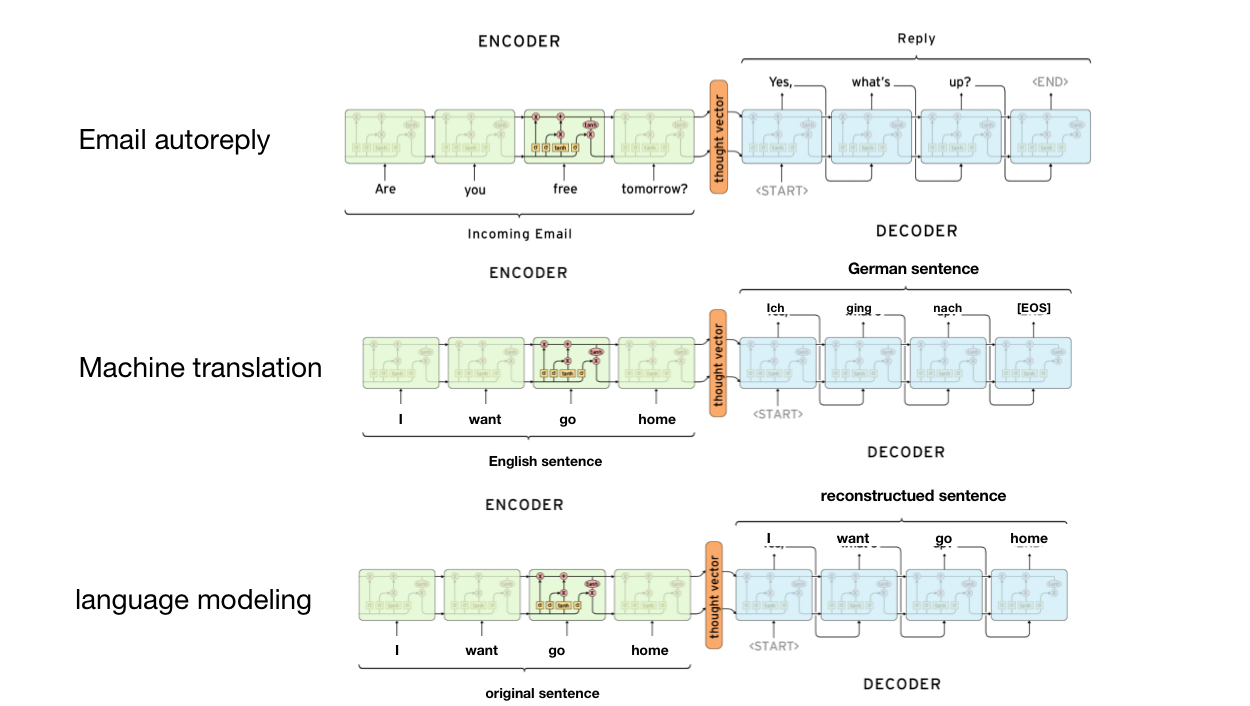

## limitation: fixed-length context vector

- Fixed-length context vector: Autoencoder relies on a single fixed-length context vector (sequence embedding) to transfer information from the encoder to the decoder. This bottleneck can limit the model's capacity to capture complex long-range dependencies and relationships between input and output sequences.


- Sequential processing: processes input and output sequences sequentially, resulting in slower training and inference times compared to models that can process sequences in parallel, such as the Transformer architecture.

- Alignment issues: In tasks like machine translation, where input and output sequences may have different lengths or require alignment between words or phrases, LSTM Autoencoder can struggle to accurately capture these alignments due to the fixed-length context vector and sequential processing.

To address some of these limitations, more advanced architectures such as the Transformer and its variants have been proposed, offering improved performance and scalability for sequence-to-sequence tasks.

## RNN decoder with attention

At each decoding step, the decoder attends to parts of the encoder output and retrieves an attention vector $\mathbf{a}^{(t)}$

- Compute Attention Score: 

    $$s_i^{(t)} = \text{score}( \mathbf{h}_{e}^{(i)}, \mathbf{h}_d^{( t-1)})$$

- compute Attention Weights: 

    $$\mathbf{\alpha}^{(t)} =\text{softmax}(\mathbf{s}^{(t)})$$


- compute Attention Vector (context): weighted average of encoder hidden states:

    $$\mathbf{a}^{(t)} = \sum_{i=1}^{T} \alpha_i^{(t)} \mathbf{h}_{e}^{(i)}$$


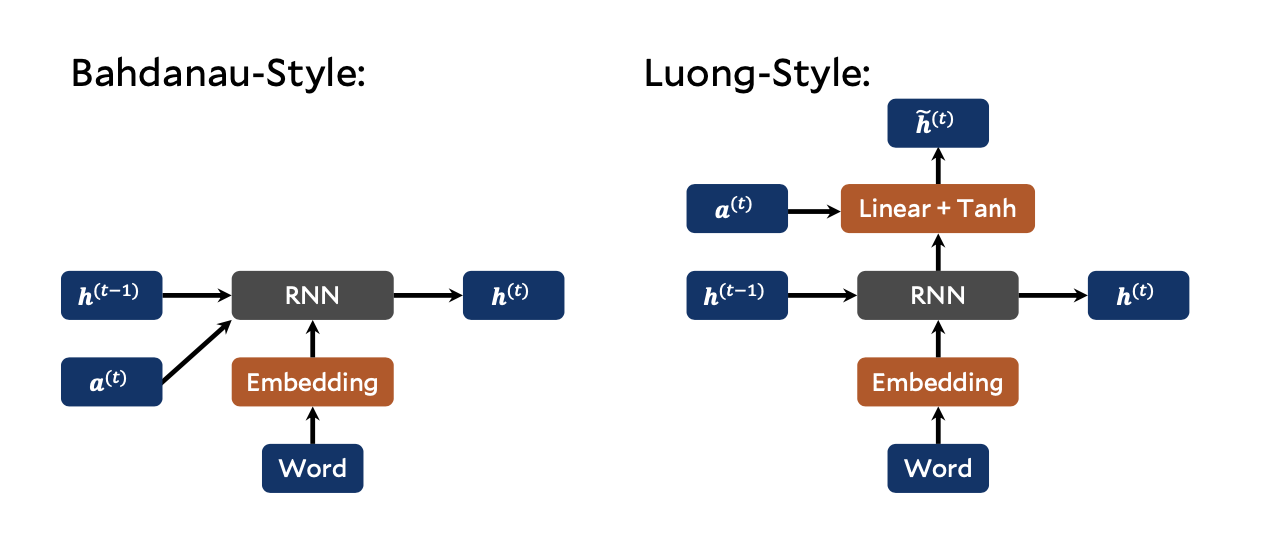

- SRN with attention

    $$\mathbf{h}_t = \text{tanh}(W_{h}\mathbf{h}_{t-1} + W_{x}\mathbf{x}_{t} + W_{a}\mathbf{a}_{t}+\mathbf{b})$$

- LSTM with attention

$$
\begin{align}
f^{(t)} &= \sigma(W_{f,x} x^{(t)} + W_{f,h} h^{(t-1)} + W_{f,a} a^{(t)} + b_f)\\

i^{(t)} &= \sigma(W_{i,x} x^{(t)} + W_{i,h} h^{(t-1)} + W_{i,a} a^{(t)} + b_i)\\

o^{(t)} &= \sigma(W_{o,x} x^{(t)} + W_{o,h} h^{(t-1)} + W_{o,a} a^{(t)} + b_o)\\

\hat{c}^{(t)} &= \tanh(W_{c,x} x^{(t)} + W_{c,h} h^{(t-1)} + W_{c,a} a^{(t)} + b_c)\\

c^{(t)} &= f^{(t)} \odot c^{(t-1)} + i^{(t)} \odot \hat{c}^{(t)}\\

h^{(t)} &= a^{(t)} \odot c^{(t)}
\end{align}
$$


- GRU with attention

$$
\begin{align}
r^{(t)} &= \sigma(W_{r,x} x^{(t)} + W_{r,h} h^{(t-1)} + W_{r,a} a^{(t)} + b_r)\\

z^{(t)} &= \sigma(W_{z,x} x^{(t)} + W_{z,h} h^{(t-1)} + W_{z,a} a^{(t)} + b_z)\\

\hat{h}^{(t)} &= \tanh(W_{h,x} x^{(t)} + W_{h,a} a^{(t)} + b_h + r^{(t)} \odot (W_{r,h} h^{(t-1)} + b_{hr}))\\

h^{(t)} &= z^{(t)} \odot h^{(t-1)} + (1 - z^{(t)}) \odot \hat{h}^{(t)}
\end{align}
$$


### Bahdanau attention

Bahdanau Attention (also known as additive attention or concat attention):

Computes the attention scores in a more complex manner compared to Luong attention, which may help in capturing more complex relationships between input and output sequences.

- Compute Attention Score: attention score at the $i$-th input position for the $t$-th decoding step. use an MLP (2 layers, tanh activation and no softmax)

    $$s_i^{(t)} = \mathbf{v}^T \tanh(W_e \mathbf{h}_{e}^{(i)} + W_d \mathbf{h}_d^{( t-1)})$$

- compute Attention Weights by softmax: 

    $$\alpha_i^{(t)} = \frac{\exp(s_i^{(t)})}{\sum_{j=1}^{T} \exp(s_j^{(t)})}$$


- compute Attention Vector (context): weighted average of encoder hidden states:

    $$\mathbf{a}^{(t)} = \sum_{i=1}^{T} \alpha_i^{(t)} \mathbf{h}_{e}^{(i)}$$


$\mathbf{h}_{(e, i)}$ represents the hidden state of the encoder at position $i$.

$\mathbf{h}^{(t-1)}_d$ is the previous hidden state of the decoder.

$\alpha_i^{(t)}$ is the attention weight for the $i$-th input position at the $t$-th decoding step.

$T$ is the length of the input sequence.

### Luong attention

Luong Attention (also known as multiplicative attention or dot attention):

Offers multiple methods for calculating attention scores, including dot product, general, and concat.

1. Dot: $s_i^{(t)} = \langle h_d^{(t)}, h_e^{(i)} \rangle$

2. Bilinear : $s_i^{(t)} = \langle h_d^{(t)}, W h_e^{(i)} \rangle$

3. MLP (similar to Bahdanau): $s_i^{(t)} = v_a^T \tanh{(W_{h} h_d^{(t)} + W_{e} h_e^{(i)})}$
